# Playing with oracles on Qiskit

Section 4.2.3 of the official Qiskit textbook shows how to construct an oracle at an abstract level (as in, you do not need to build up the oracle from quantum gates yourself). The example in the textbook deal with LogicalExpressionOracle. Here we play with TruthTableOracle.

In [6]:
import numpy as np
from qiskit import BasicAer
from qiskit.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
from qiskit.aqua import QuantumInstance, run_algorithm
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

Now let's build an oracle with the following truth table.

| q1 | q2 | q3 | output |
|----|:--:|---:|:--------:|
| 0  |  0 |  0 |  0      |
| 0  |  0 |  1 |  1      |
| 0  |  1 |  0 |  0      |
| 0  |  1  | 1  |  0      |
| 1  | 0  | 0  |  1      |
| 1  | 0  | 1  |  0      |
| 1  | 1  | 1  |  1      |

In [22]:
oracle = TruthTableOracle('01000101')

You see that you only need to specify the output.The input bitstring progresses from the lowest to the highest and the oracle constructor assumes that you put in the output bitstring in that order. Now we use Grover's algorithm to find the inputs that return 1.

In [9]:
grover = Grover(oracle)

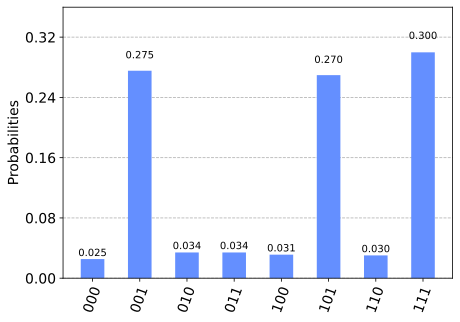

In [16]:
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
plot_histogram(result['measurement'])

Cool, so Grover's algorithm correctly predicts that the inputs we want to find are 001,101, and 111. But how did Qiskit build up this oracle in actual circuit? If we type `oracle.circuit.draw('mpl')`, we will see three registers: one for variables ("v"), one for ancillary ("a") and one for output ("o").

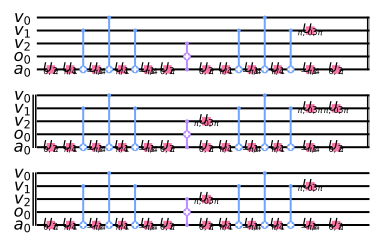

In [34]:
oracle.circuit.draw('mpl',scale=0.2)

It looks pretty long...and we are only using 3-bit input.

In [36]:
sum(oracle.circuit.count_ops().values())

63

There are a total of 63 operations (including single qubit rotations, CX gates and Toffoli gates). What about depth? If you view the circuit diagram above as a music sheet, then a layer corresponds to one beat, and the depth of the circuit is the number of beats in the music sheet.

In [38]:
oracle.circuit.depth()

57